In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df=pd.read_csv('UNSW-NB15_4.csv')

In [3]:
df.head()

,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,,2,2.1,7,4,1,1.1,3,Unnamed: 47,0.4
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633186,25056,1094788,31,...,,9,7,2,3,2,1,6,NaN,0


## Exploratory data analysis (EDA)

### Basic Informations

In [4]:
# Shape
df.shape

(440043, 49)

In [5]:
# column names
df.columns

Index(['59.166.0.9', '7045', '149.171.126.7', '25', 'tcp', 'FIN', '0.201886',
       '37552', '3380', '31', '29', '18', '8', 'smtp', '1459437.5',
       '130766.8672', '52', '42', '255', '255.1', '1422136554', '3572668484',
       '722', '80', '0', '0.1', '456.043567', '15.530109', '1424250009',
       '1424250009.1', '3.943843', '4.912488', '0.00059', '0.000473',
       '0.000117', '0.2', '0.3', 'Unnamed: 37', 'Unnamed: 38', ' ', '2', '2.1',
       '7', '4', '1', '1.1', '3', 'Unnamed: 47', '0.4'],
      dtype='object')

In [6]:
# Renaming columns
df=df.rename(columns={'59.166.0.9':'srcip','7045':'sport','149.171.126.7':'dstip','25':'dsport','tcp':'proto','FIN':'state','0.201886':'dur','37552':'sbytes','3380':'dbytes','31':'sttl','29':'dttl','18':'sloss','8':'dloss','smtp':'service','1459437.5':'Sload','130766.8672':'Dload','52':'Spkts','42':'Dpkts','255':'swin','255.1':'dwin','1422136554':'stcpb','3572668484':'dtcpb','722':'smeansz','80':'dmeansz','0':'trans_depth','0.1':'res_bdy_len','456.043567':'Sjit','15.530109':'Djit','1424250009':'Stime','1424250009.1':'Ltime','3.943843':'Sintpkt','4.912488':'Dintpkt','0.00059':'tcprtt','0.000473':'synack','0.000117':'ackdat','0.2':'is_sm_ips_ports','0.3':'ct_state_ttl','Unnamed: 37':'ct_flw_http_mthd','Unnamed: 38':'is_ftp_login',' ':'ct_ftp_cmd','2':'ct_srv_src','2.1':'ct_srv_dst','7':'ct_dst_ltm','4':'ct_src_ltm','1':'ct_src_dport_ltm','1.1':'ct_dst_sport_ltm','3':'ct_dst_src_ltm','Unnamed: 47':'attack_cat' ,'0.4':'Label'})





In [7]:
df.head(20)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633186,25056,1094788,31,...,,9,7,2,3,2,1,6,NaN,0
5,175.45.176.0,49582,149.171.126.12,80,tcp,FIN,0.189983,13304,268,254,...,,1,1,1,1,1,1,1,Exploits,1
6,175.45.176.1,0,149.171.126.11,0,sctp,INT,0.000009,440,0,254,...,,1,1,1,1,1,1,2,Fuzzers,1
7,175.45.176.1,0,149.171.126.11,0,sctp,INT,0.000009,440,0,254,...,,1,1,1,1,1,1,2,Exploits,1
8,175.45.176.1,0,149.171.126.11,0,sctp,INT,0.000009,440,0,254,...,,1,1,1,1,1,1,2,Exploits,1
9,175.45.176.1,0,149.171.126.11,0,sctp,INT,0.000009,440,0,254,...,,1,1,1,1,1,1,2,Exploits,1


In [8]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440043 entries, 0 to 440042
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             440043 non-null  object 
 1   sport             440043 non-null  int64  
 2   dstip             440043 non-null  object 
 3   dsport            440043 non-null  object 
 4   proto             440043 non-null  object 
 5   state             440043 non-null  object 
 6   dur               440043 non-null  float64
 7   sbytes            440043 non-null  int64  
 8   dbytes            440043 non-null  int64  
 9   sttl              440043 non-null  int64  
 10  dttl              440043 non-null  int64  
 11  sloss             440043 non-null  int64  
 12  dloss             440043 non-null  int64  
 13  service           440043 non-null  object 
 14  Sload             440043 non-null  float64
 15  Dload             440043 non-null  float64
 16  Spkts             44

In [9]:
# Data types
df.dtypes

srcip                object
sport                 int64
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

In [10]:
#Descriptive statistics
df.describe()

,sport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,440043.000000,440043.000000,4.400430e+05,4.400430e+05,440043.000000,440043.00000,440043.000000,440043.000000,4.400430e+05,4.400430e+05,...,33560.000000,6632.000000,440043.000000,440043.000000,440043.000000,440043.000000,440043.000000,440043.000000,440043.000000,440043.000000
mean,29206.596012,0.580891,3.805845e+03,2.693353e+04,82.507198,29.45763,4.164452,12.246319,6.694359e+07,1.951192e+06,...,1.113707,1.020205,11.513688,11.359933,8.396202,8.792045,7.027043,5.416432,10.423106,0.202012
std,21228.825583,3.694477,6.526861e+04,1.378659e+05,88.488980,51.09042,25.464167,48.760650,1.531325e+08,3.915267e+06,...,0.623117,0.236629,12.634939,12.684656,9.500760,9.424603,10.041745,7.298223,13.109091,0.401502
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,6269.000000,0.000009,1.460000e+02,0.000000e+00,31.000000,0.00000,0.000000,0.000000,3.043405e+05,0.000000e+00,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,31212.000000,0.004552,5.340000e+02,3.040000e+02,31.000000,29.00000,0.000000,0.000000,9.235249e+05,7.638522e+04,...,1.000000,1.000000,5.000000,5.000000,4.000000,5.000000,1.000000,1.000000,3.000000,0.000000
75%,47439.000000,0.089166,2.646000e+03,1.016800e+04,60.000000,29.00000,7.000000,8.000000,7.600000e+07,1.053726e+06,...,1.000000,1.000000,19.000000,19.000000,13.000000,13.000000,12.000000,10.000000,19.000000,0.000000
max,65535.000000,59.999989,1.106347e+07,1.283855e+07,255.000000,254.00000,4158.000000,4829.000000,5.600000e+09,2.290690e+07,...,9.000000,4.000000,63.000000,63.000000,60.000000,60.000000,60.000000,60.000000,63.000000,1.000000


### Check for duplicates

In [11]:
df.duplicated().sum()

133325

In [12]:
## there are duplicates rows

In [13]:
# Droping duplicates
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(306718, 49)

In [15]:
# unique values
df.nunique()

srcip                   38
sport                63728
dstip                   43
dsport               48861
proto                  133
state                   14
dur                 142811
sbytes                4572
dbytes                3886
sttl                    11
dttl                     7
sloss                  245
dloss                  283
service                 13
Sload               198259
Dload               198440
Spkts                  404
Dpkts                  336
swin                     8
dwin                    15
stcpb               211583
dtcpb               211508
smeansz               1230
dmeansz               1191
trans_depth              7
res_bdy_len           1386
Sjit                213095
Djit                218470
Stime                11773
Ltime                11771
Sintpkt             184877
Dintpkt             183899
tcprtt               22067
synack               20917
ackdat               19509
is_sm_ips_ports          2
ct_state_ttl             5
c

#### Missing values 

In [16]:
df.isnull().sum()

srcip                    0
sport                    0
dstip                    0
dsport                   0
proto                    0
state                    0
dur                      0
sbytes                   0
dbytes                   0
sttl                     0
dttl                     0
sloss                    0
dloss                    0
service                  0
Sload                    0
Dload                    0
Spkts                    0
Dpkts                    0
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smeansz                  0
dmeansz                  0
trans_depth              0
res_bdy_len              0
Sjit                     0
Djit                     0
Stime                    0
Ltime                    0
Sintpkt                  0
Dintpkt                  0
tcprtt                   0
synack                   0
ackdat                   0
is_sm_ips_ports          0
ct_state_ttl             0
c

In [17]:
(df.isnull().sum()/(len(df)))*100

srcip                0.000000
sport                0.000000
dstip                0.000000
dsport               0.000000
proto                0.000000
state                0.000000
dur                  0.000000
sbytes               0.000000
dbytes               0.000000
sttl                 0.000000
dttl                 0.000000
sloss                0.000000
dloss                0.000000
service              0.000000
Sload                0.000000
Dload                0.000000
Spkts                0.000000
Dpkts                0.000000
swin                 0.000000
dwin                 0.000000
stcpb                0.000000
dtcpb                0.000000
smeansz              0.000000
dmeansz              0.000000
trans_depth          0.000000
res_bdy_len          0.000000
Sjit                 0.000000
Djit                 0.000000
Stime                0.000000
Ltime                0.000000
Sintpkt              0.000000
Dintpkt              0.000000
tcprtt               0.000000
synack    

## Univariate analysis

In [18]:
df['Label'].value_counts()

0    281461
1     25257
Name: Label, dtype: int64

In [19]:
df['Label'].value_counts(normalize=True)*100

0    91.7654
1     8.2346
Name: Label, dtype: float64

In [20]:
# missing values are  found

In [21]:
df['attack_cat']=='NaN' 

0         False
1         False
2         False
3         False
4         False
          ...  
440035    False
440037    False
440038    False
440041    False
440042    False
Name: attack_cat, Length: 306718, dtype: bool

In [22]:
df[df['Label']==1]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
5,175.45.176.0,49582,149.171.126.12,80,tcp,FIN,0.189983,13304,268,254,...,,1,1,1,1,1,1,1,Exploits,1
6,175.45.176.1,0,149.171.126.11,0,sctp,INT,0.000009,440,0,254,...,,1,1,1,1,1,1,2,Fuzzers,1
7,175.45.176.1,0,149.171.126.11,0,sctp,INT,0.000009,440,0,254,...,,1,1,1,1,1,1,2,Exploits,1
10,175.45.176.1,0,149.171.126.11,0,sctp,INT,0.000009,440,0,254,...,,1,1,1,1,1,1,2,Backdoor,1
44,175.45.176.1,0,149.171.126.11,0,sctp,INT,0.000009,440,0,254,...,,1,1,1,1,1,1,2,DoS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439984,175.45.176.0,47439,149.171.126.10,53,udp,INT,0.000001,114,0,254,...,,15,15,15,15,15,15,15,Generic,1
440024,175.45.176.0,17293,149.171.126.17,110,tcp,CON,0.942984,574,676,62,...,,2,1,2,4,2,2,2,Exploits,1
440025,175.45.176.0,33654,149.171.126.12,80,tcp,CON,2.579405,269883,1300,62,...,,2,1,2,4,2,2,2,DoS,1
440026,175.45.176.0,33654,149.171.126.12,80,tcp,CON,2.579405,269883,1300,62,...,,1,1,2,4,2,2,2,DoS,1


#### Count plot of target

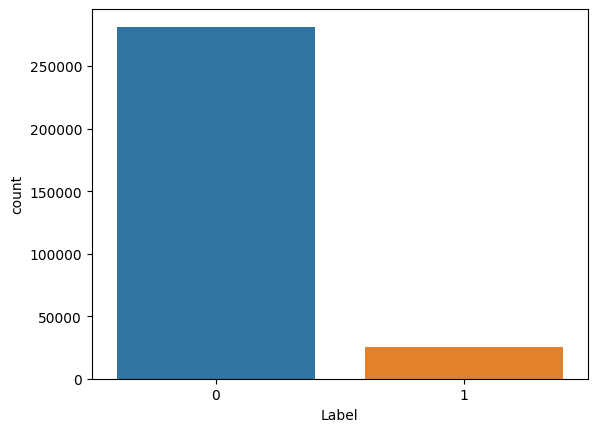

In [23]:
sns.countplot(x='Label',data=df)  
plt.show()  

In [24]:
df['service'].value_counts()

-           168099
dns          61481
http         32777
ftp-data     18228
smtp         12139
ssh           6842
ftp           6692
pop3           363
ssl             30
snmp            26
dhcp            25
radius           9
irc              7
Name: service, dtype: int64

#### count plot of service

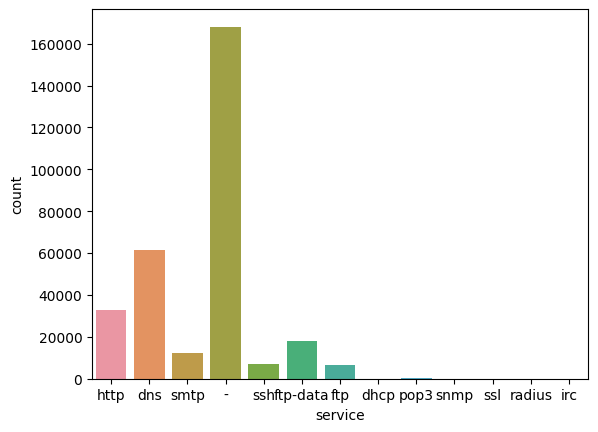

In [25]:
sns.countplot(x='service',data=df)  
plt.show() 

In [26]:
df['attack_cat'].value_counts()

Generic             6894
Exploits            6851
 Fuzzers            4970
 Reconnaissance     3420
DoS                 1465
Backdoor             623
Analysis             621
 Shellcode           371
Worms                 42
Name: attack_cat, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


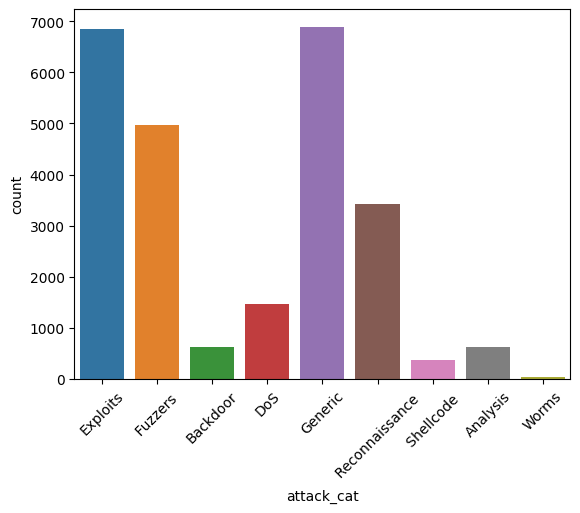

In [27]:
sns.countplot(df['attack_cat'])
plt.xticks(rotation=45)
plt.show()

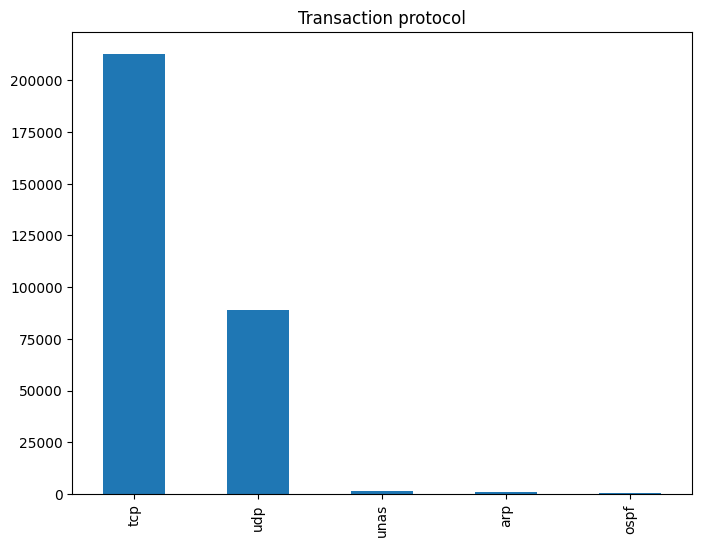

In [28]:
top_5 = df['proto'].value_counts()[:5]
top_5.plot(kind='bar',figsize=(8,6))
plt.title('Transaction protocol')
plt.show()

In [29]:
df['proto'].value_counts()

tcp     212702
udp      88817
unas      1470
arp        962
ospf       687
         ...  
xtp         14
idpr        14
ib          14
igmp        13
rtp          2
Name: proto, Length: 133, dtype: int64

In [30]:
df['proto'].unique()

array(['tcp', 'udp', 'sctp', 'arp', 'icmp', 'ospf', 'igmp', 'rtp', 'ggp',
       'ip', 'ipnip', 'st2', 'argus', 'bbn-rcc', 'egp', 'emcon', 'igp',
       'nvp', 'pup', 'xnet', 'cbt', 'chaos', 'mux', 'dcn', 'hmp', 'prm',
       'xns-idp', 'trunk-1', 'trunk-2', 'leaf-2', 'leaf-1', 'irtp', 'rdp',
       'iso-tp4', 'netblt', 'mfe-nsp', 'merit-inp', 'sep', '3pc', 'idpr',
       'xtp', 'idpr-cmtp', 'ddp', 'tp++', 'il', 'ipv6', 'sdrp',
       'ipv6-route', 'ipv6-frag', 'idrp', 'rsvp', 'gre', 'mhrp', 'bna',
       'i-nlsp', 'swipe', 'narp', 'mobile', 'skip', 'tlsp', 'ipv6-no',
       'ipv6-opts', 'any', 'sat-expak', 'cftp', 'kryptolan', 'ippc',
       'rvd', 'sat-mon', 'visa', 'cphb', 'cpnx', 'ipcv', 'pvp', 'wsn',
       'br-sat-mon', 'sun-nd', 'wb-mon', 'iso-ip', 'wb-expak',
       'secure-vmtp', 'vines', 'vmtp', 'dgp', 'nsfnet-igp', 'ttp', 'tcf',
       'eigrp', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip', 'aes-sp3-d',
       'micp', 'encap', 'etherip', 'pri-enc', 'gmtp', 'ifmp', 'pnni',
   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


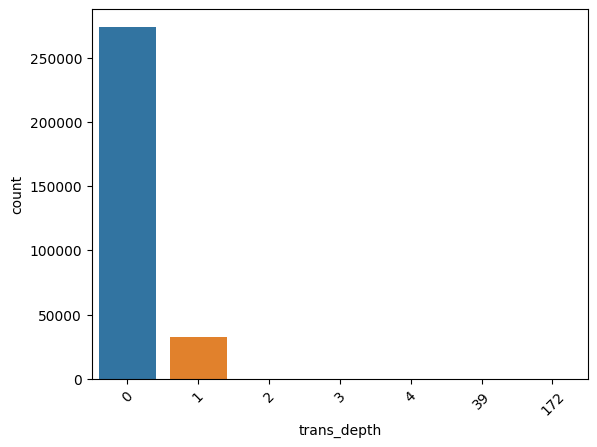

In [31]:
sns.countplot(df['trans_depth'])
plt.xticks(rotation=45)
plt.show()

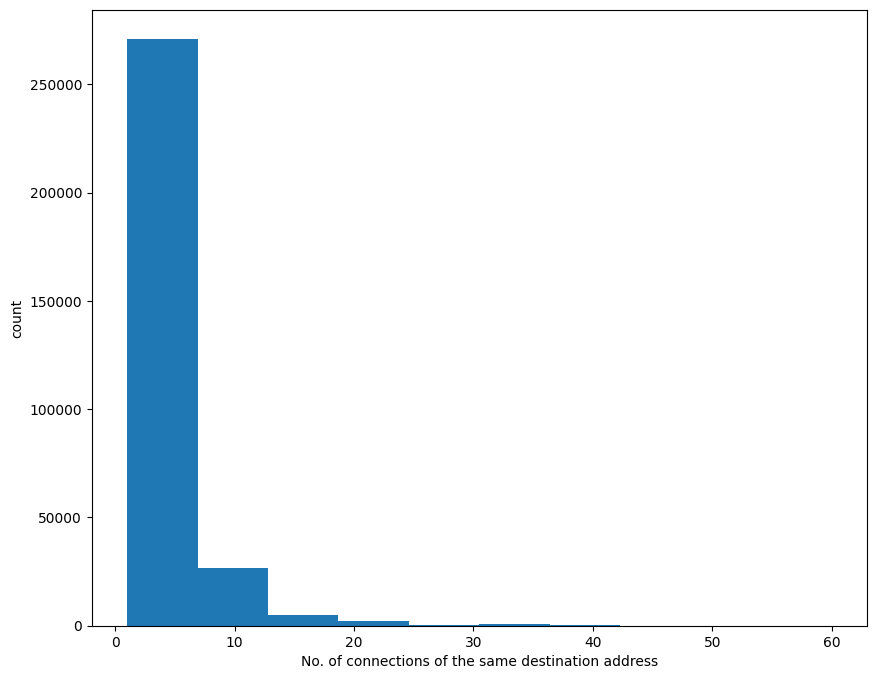

In [32]:
plt.figure(figsize=(10,8))
plt.hist(df['ct_dst_ltm'])
plt.xlabel('No. of connections of the same destination address')
plt.ylabel('count')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


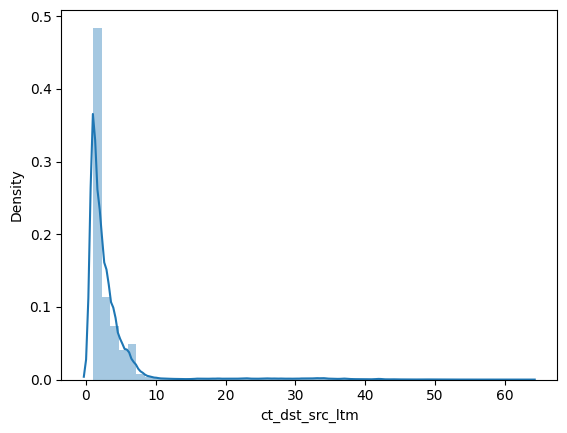

In [33]:
sns.distplot(df["ct_dst_src_ltm"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


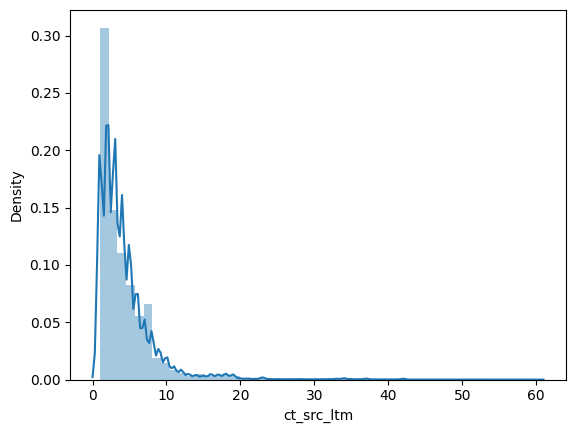

In [34]:
sns.distplot(df["ct_src_ltm"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


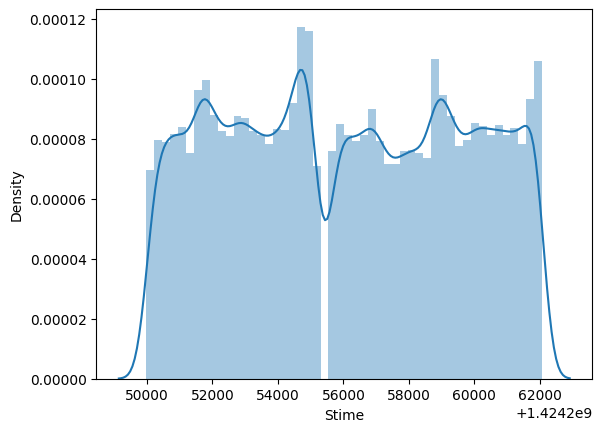

In [35]:
sns.distplot(df["Stime"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


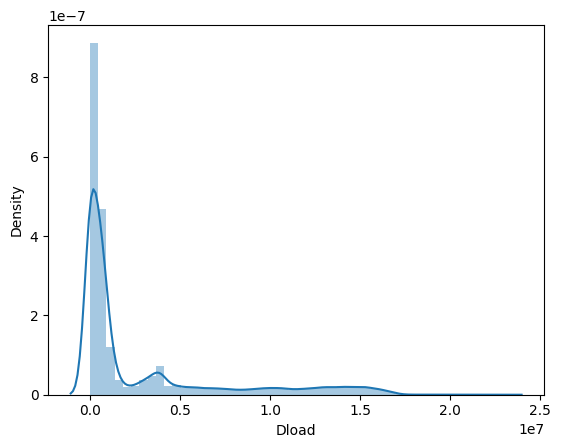

In [36]:
sns.distplot(df["Dload"])
plt.show()

In [37]:
df['proto'].value_counts()

tcp     212702
udp      88817
unas      1470
arp        962
ospf       687
         ...  
xtp         14
idpr        14
ib          14
igmp        13
rtp          2
Name: proto, Length: 133, dtype: int64

In [38]:
df['ct_ftp_cmd'].value_counts()

     300349
1      6335
4        27
2         7
Name: ct_ftp_cmd, dtype: int64

In [39]:
df['ct_ftp_cmd']

0          
1          
2          
3          
4          
         ..
440035     
440037     
440038     
440041     
440042     
Name: ct_ftp_cmd, Length: 306718, dtype: object

In [40]:
df['ct_state_ttl'].value_counts()

0    272404
1     18306
2     14110
3      1011
6       887
Name: ct_state_ttl, dtype: int64

In [41]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633186,25056,1094788,31,...,,9,7,2,3,2,1,6,NaN,0


### Bivariate analysis

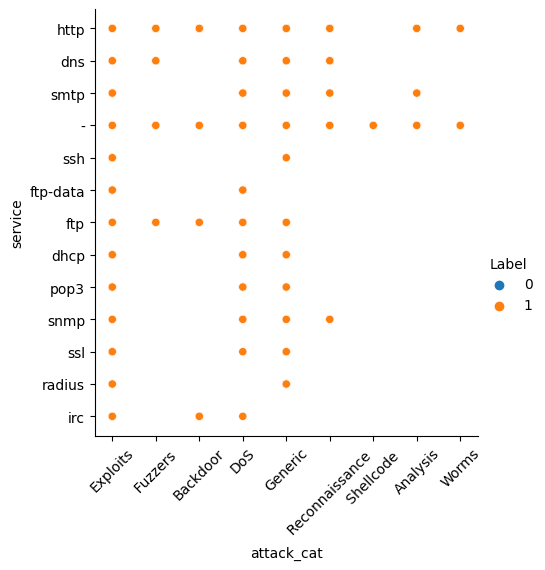

In [42]:
sns.relplot(x= 'attack_cat', y ='service', hue='Label',data = df)
plt.xticks(rotation=45)
plt.show()

In [44]:
df['state'].value_counts()

FIN    210534
CON     74857
INT     19798
REQ      1330
RST        95
ECO        85
PAR         6
URN         2
no          2
MAS         2
ACC         2
TST         2
ECR         2
TXD         1
Name: state, dtype: int64

In [45]:
(df.isnull().sum()/(len(df)))*100

srcip                0.000000
sport                0.000000
dstip                0.000000
dsport               0.000000
proto                0.000000
state                0.000000
dur                  0.000000
sbytes               0.000000
dbytes               0.000000
sttl                 0.000000
dttl                 0.000000
sloss                0.000000
dloss                0.000000
service              0.000000
Sload                0.000000
Dload                0.000000
Spkts                0.000000
Dpkts                0.000000
swin                 0.000000
dwin                 0.000000
stcpb                0.000000
dtcpb                0.000000
smeansz              0.000000
dmeansz              0.000000
trans_depth          0.000000
res_bdy_len          0.000000
Sjit                 0.000000
Djit                 0.000000
Stime                0.000000
Ltime                0.000000
Sintpkt              0.000000
Dintpkt              0.000000
tcprtt               0.000000
synack    

In [46]:
df['attack_cat'].value_counts()

Generic             6894
Exploits            6851
 Fuzzers            4970
 Reconnaissance     3420
DoS                 1465
Backdoor             623
Analysis             621
 Shellcode           371
Worms                 42
Name: attack_cat, dtype: int64

In [47]:
df['attack_cat'].value_counts(normalize=True)*100


Generic             27.295403
Exploits            27.125153
 Fuzzers            19.677713
 Reconnaissance     13.540801
DoS                  5.800372
Backdoor             2.466643
Analysis             2.458724
 Shellcode           1.468900
Worms                0.166291
Name: attack_cat, dtype: float64

In [48]:
df_generic=df[df['attack_cat']=='Generic']

In [49]:
df_generic

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
50,175.45.176.1,0,149.171.126.11,0,sctp,INT,0.000009,440,0,254,...,,1,1,1,1,1,1,2,Generic,1
100,175.45.176.0,12334,149.171.126.13,5060,udp,INT,0.000010,1376,0,254,...,,1,1,1,1,1,1,1,Generic,1
501,175.45.176.1,1707,149.171.126.10,5060,udp,INT,0.000010,1354,0,254,...,,1,1,1,1,1,1,1,Generic,1
595,175.45.176.0,12720,149.171.126.14,80,tcp,FIN,0.244791,1112,26344,62,...,,1,1,1,1,1,1,1,Generic,1
660,175.45.176.1,14975,149.171.126.11,80,tcp,FIN,0.684788,1984,67738,62,...,,1,1,1,1,1,1,1,Generic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439811,175.45.176.0,47439,149.171.126.10,53,udp,INT,0.000003,114,0,254,...,,14,14,15,15,14,14,15,Generic,1
439814,175.45.176.0,47439,149.171.126.10,53,udp,INT,0.000003,114,0,254,...,,19,19,2,2,2,2,19,Generic,1
439828,175.45.176.0,1043,149.171.126.10,53,udp,INT,0.000003,114,0,254,...,,19,19,17,17,17,17,19,Generic,1
439983,175.45.176.0,47439,149.171.126.10,53,udp,INT,0.000001,114,0,254,...,,1,1,1,1,1,1,1,Generic,1


In [50]:
df_generic.describe()

,sport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,6894.000000,6894.000000,6.894000e+03,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6.894000e+03,6.894000e+03,...,446.000000,0.0,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.0
mean,23619.610676,0.449421,2.098914e+03,9.464805e+03,244.420366,28.116623,0.953873,3.727879,1.080763e+08,2.099401e+04,...,1.042601,NaN,19.948941,19.908616,12.333478,12.579054,12.102408,9.246156,19.993908,1.0
std,23004.570648,3.503745,6.206853e+04,1.584007e+05,41.888278,79.071518,23.356071,58.212178,1.838956e+08,1.375625e+05,...,0.329080,NaN,12.406049,12.452995,9.732475,9.709149,9.699576,6.396485,12.433101,0.0
min,0.000000,0.000001,6.000000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,1043.000000,0.000004,1.140000e+02,0.000000e+00,254.000000,0.000000,0.000000,0.000000,5.066666e+07,0.000000e+00,...,1.000000,NaN,8.000000,7.250000,3.000000,4.000000,3.000000,2.000000,8.000000,1.0
50%,14360.000000,0.000008,1.140000e+02,0.000000e+00,254.000000,0.000000,0.000000,0.000000,5.700000e+07,0.000000e+00,...,1.000000,NaN,21.000000,21.000000,12.000000,12.000000,12.000000,9.000000,22.000000,1.0
75%,47439.000000,0.000009,1.140000e+02,0.000000e+00,254.000000,0.000000,0.000000,0.000000,1.140000e+08,0.000000e+00,...,1.000000,NaN,30.000000,30.000000,17.000000,17.000000,17.000000,16.000000,30.000000,1.0
max,65422.000000,59.972233,3.592470e+06,8.645430e+06,254.000000,252.000000,1358.000000,3246.000000,5.600000e+09,2.235491e+06,...,4.000000,NaN,52.000000,52.000000,51.000000,51.000000,51.000000,31.000000,52.000000,1.0


In [51]:
df[df['attack_cat']=='DoS']

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
44,175.45.176.1,0,149.171.126.11,0,sctp,INT,0.000009,440,0,254,...,,1,1,1,1,1,1,2,DoS,1
703,175.45.176.3,34432,149.171.126.13,80,tcp,FIN,0.198278,790,268,254,...,,2,1,1,1,1,1,1,DoS,1
832,175.45.176.2,15957,149.171.126.12,80,tcp,FIN,1.398715,7058,9826,254,...,,2,1,1,1,1,1,1,DoS,1
1292,175.45.176.2,0,149.171.126.11,0,ospf,INT,1.586461,2858,0,254,...,,1,1,1,1,1,1,1,DoS,1
1664,175.45.176.1,57101,149.171.126.13,80,tcp,FIN,0.336769,1060,67045,62,...,,1,1,1,1,1,1,1,DoS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439257,175.45.176.2,28720,149.171.126.15,25,tcp,FIN,1.770885,2641,1802,62,...,,1,1,3,1,1,1,1,DoS,1
439344,175.45.176.3,46257,149.171.126.19,25,tcp,FIN,1.445151,86346,2292,62,...,,1,1,1,1,1,1,1,DoS,1
439944,175.45.176.0,18979,149.171.126.12,80,tcp,FIN,2.358193,330718,1816,62,...,,1,1,1,1,1,1,1,DoS,1
440025,175.45.176.0,33654,149.171.126.12,80,tcp,CON,2.579405,269883,1300,62,...,,2,1,2,4,2,2,2,DoS,1


#### Visualize the Unique counts

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


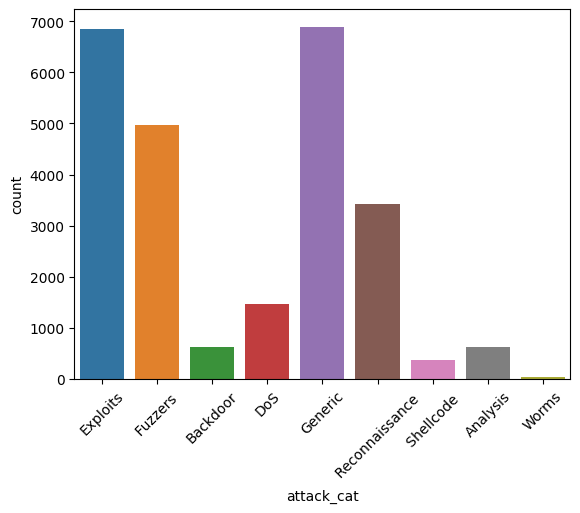

In [52]:
sns.countplot(df['attack_cat'])
plt.xticks(rotation=45)
plt.show()

#### Correlation

In [53]:
df.corr()

,sport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
sport,1.000000,-0.074055,-0.001557,0.005436,-0.065221,0.062824,0.003671,0.007848,-0.053729,0.018551,...,0.011176,-0.010404,-0.050017,-0.054519,-0.046080,-0.039659,-0.065523,-0.083068,-0.065725,-0.080679
dur,-0.074055,1.000000,0.173351,0.305755,0.036787,0.044747,0.191039,0.307161,-0.031053,-0.101100,...,-0.005251,0.006018,-0.059379,-0.052970,-0.044543,-0.062805,-0.031917,-0.015733,-0.028055,0.056239
sbytes,-0.001557,0.173351,1.000000,0.031429,0.016113,0.062373,0.976094,0.032947,-0.008420,-0.012872,...,0.003056,-0.007149,-0.024205,-0.024268,-0.016041,-0.017315,-0.013697,-0.011408,-0.016996,0.045580
dbytes,0.005436,0.305755,0.031429,1.000000,-0.074217,-0.026500,0.075138,0.991707,-0.037588,0.087981,...,-0.005823,-0.024006,-0.007094,-0.007658,-0.031661,-0.043225,-0.027541,-0.040971,-0.028787,-0.048163
sttl,-0.065221,0.036787,0.016113,-0.074217,1.000000,0.459765,-0.016321,-0.092676,0.320323,-0.209726,...,0.002912,-0.012310,0.219056,0.213424,0.107943,0.108672,0.239793,0.269101,0.305964,0.767523
dttl,0.062824,0.044747,0.062373,-0.026500,0.459765,1.000000,0.053180,-0.031249,-0.115896,-0.135408,...,0.046356,-0.017287,-0.177209,-0.190056,-0.185960,-0.175751,-0.129232,-0.126970,-0.142512,0.474993
sloss,0.003671,0.191039,0.976094,0.075138,-0.016321,0.053180,1.000000,0.100017,-0.029111,0.022558,...,0.004365,-0.038365,-0.030954,-0.033135,-0.032732,-0.035511,-0.035421,-0.034332,-0.040675,0.017874
dloss,0.007848,0.307161,0.032947,0.991707,-0.092676,-0.031249,0.100017,1.000000,-0.047990,0.109552,...,-0.005254,-0.034810,-0.014927,-0.016991,-0.041648,-0.052981,-0.041062,-0.053162,-0.043849,-0.061525
Sload,-0.053729,-0.031053,-0.008420,-0.037588,0.320323,-0.115896,-0.029111,-0.047990,1.000000,-0.094269,...,0.000441,-0.013385,0.318466,0.323474,0.223384,0.216339,0.314556,0.317790,0.376637,0.227660
Dload,0.018551,-0.101100,-0.012872,0.087981,-0.209726,-0.135408,0.022558,0.109552,-0.094269,1.000000,...,0.007900,-0.013284,0.031625,-0.012315,-0.099169,-0.062100,-0.129959,-0.111773,-0.152452,-0.186701


#### Heatmap

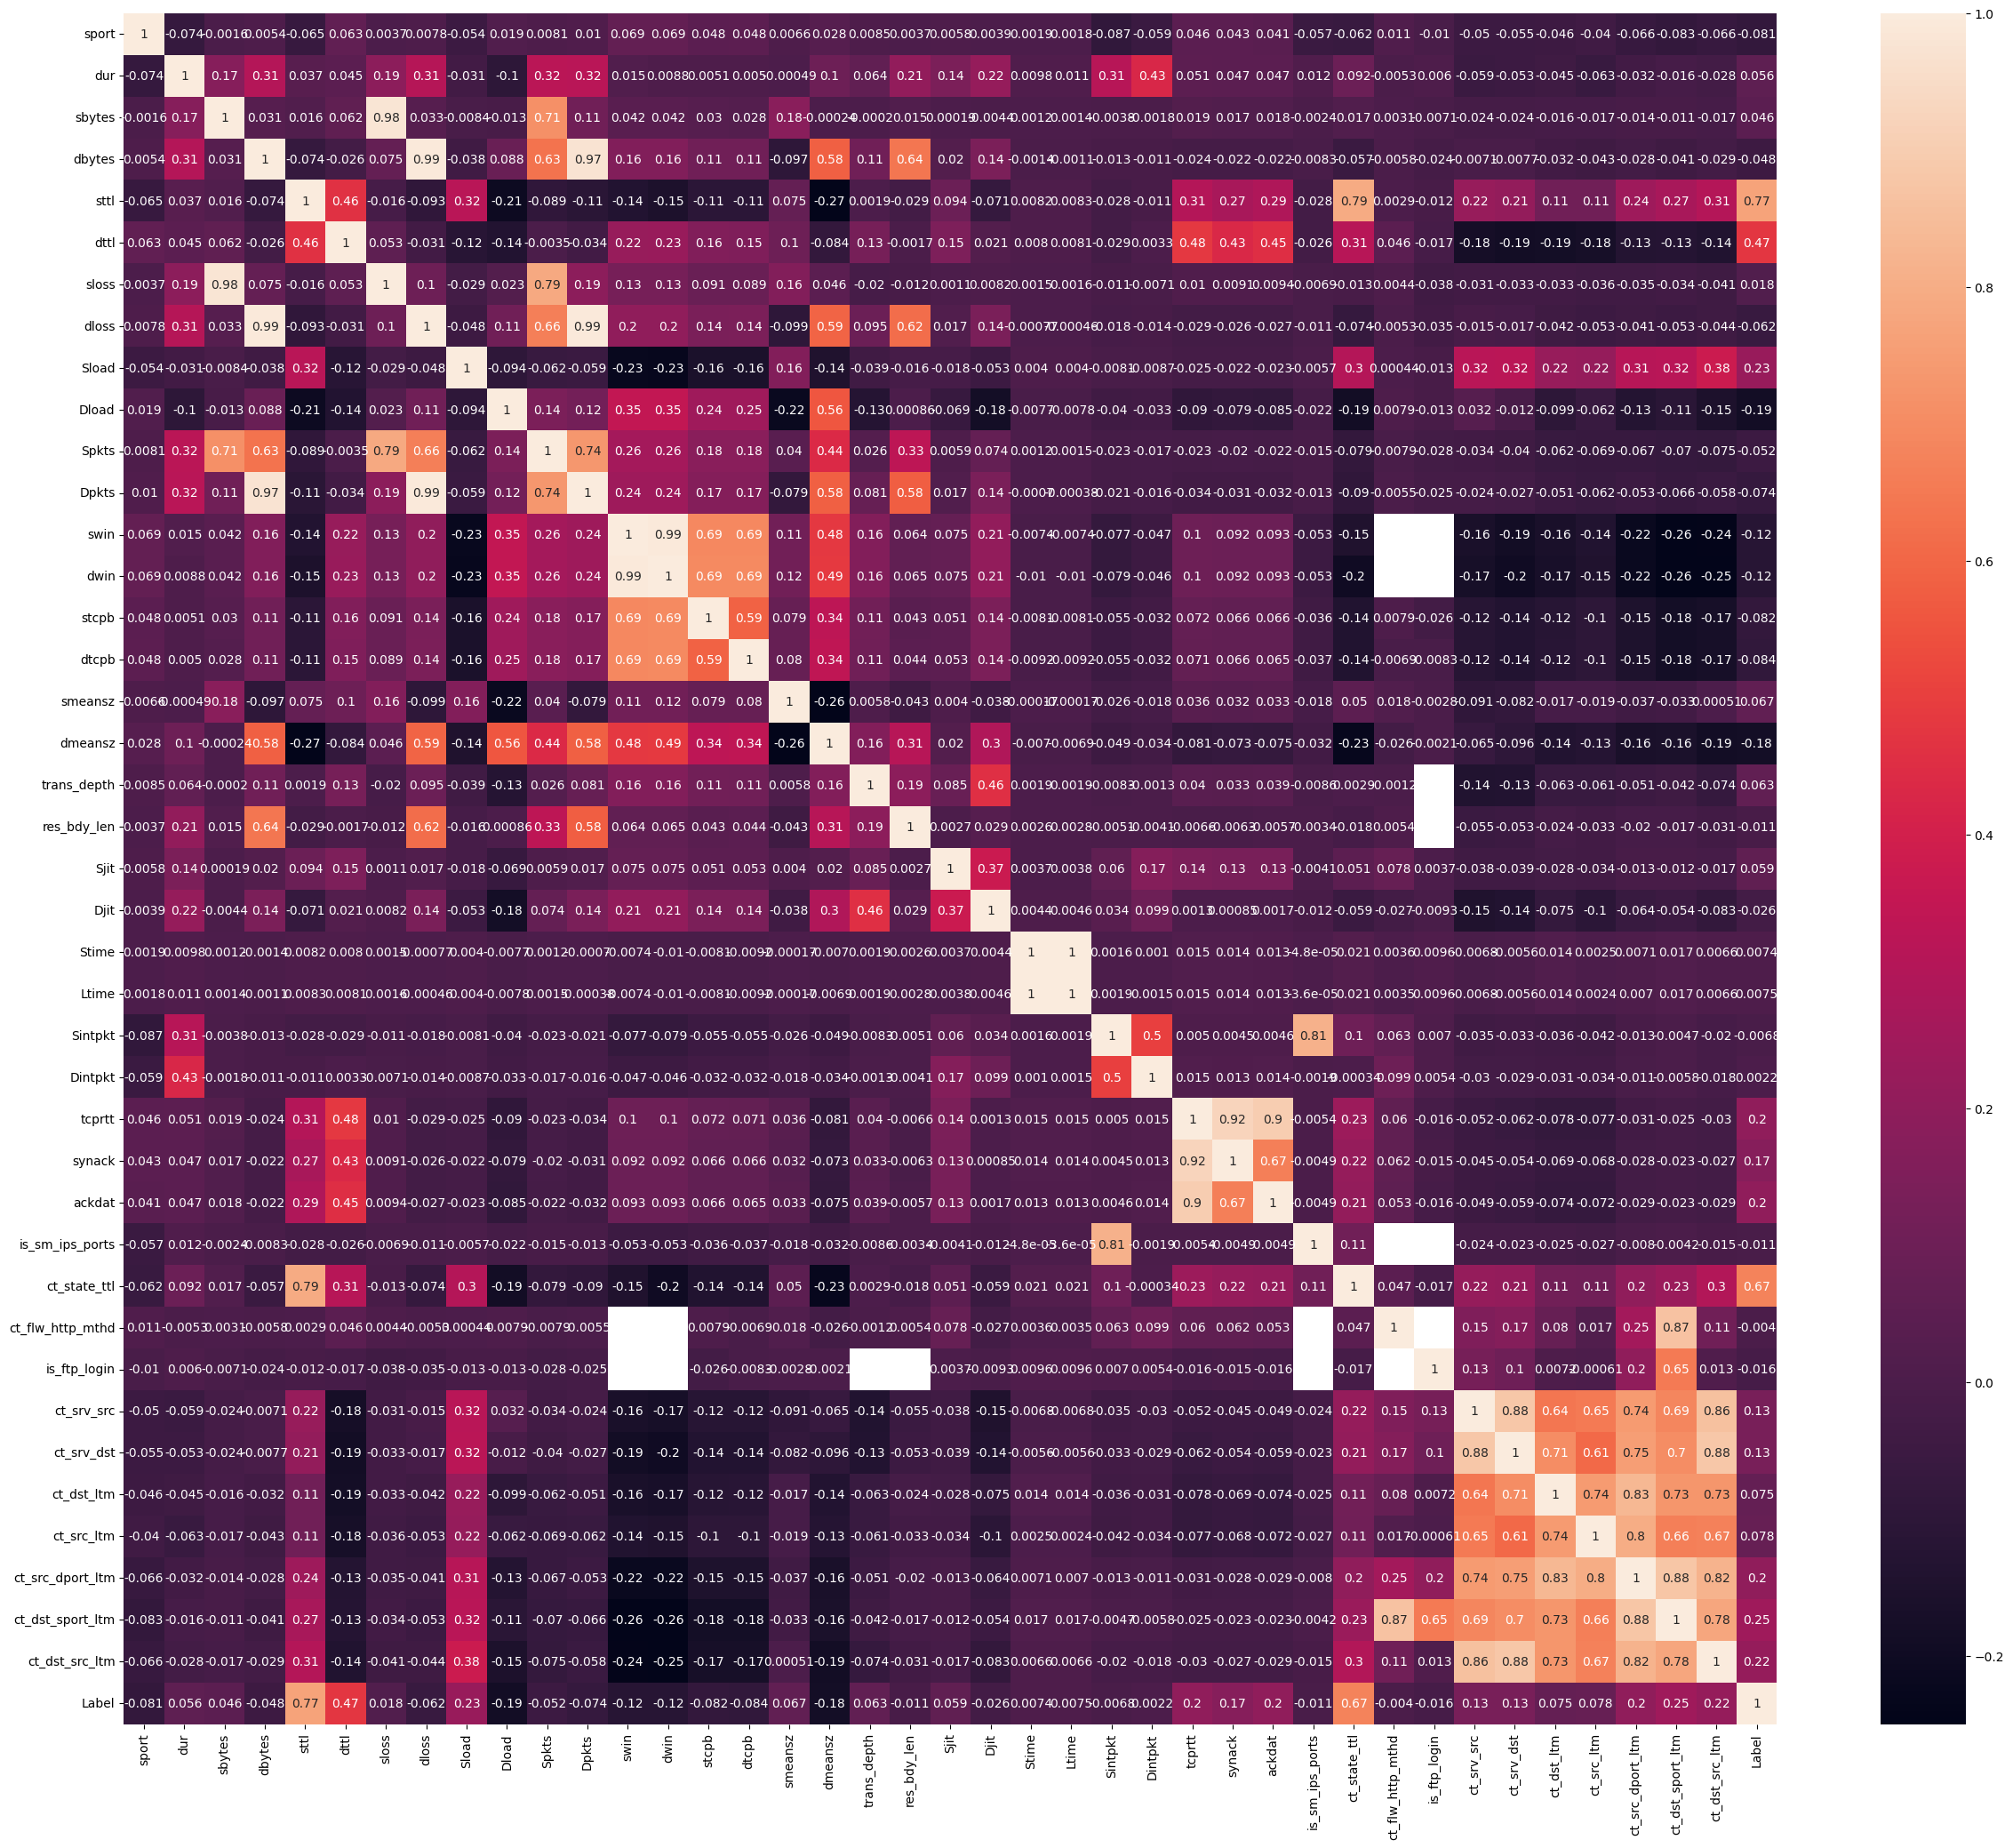

In [54]:
#Correlation plot
plt.figure(figsize=(30,25) )
sns.heatmap(df.corr(),vmin=-0.25, vmax=1,annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


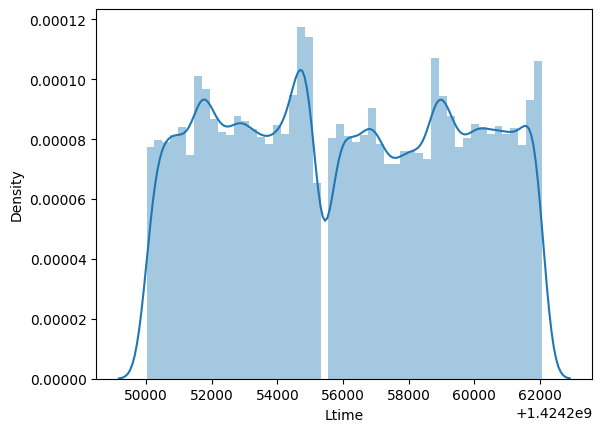

In [55]:
sns.distplot(df["Ltime"])
plt.show()


### Box plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


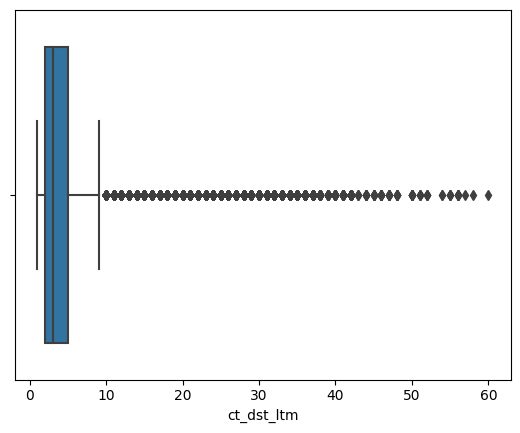

In [56]:
sns.boxplot(df['ct_dst_ltm'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


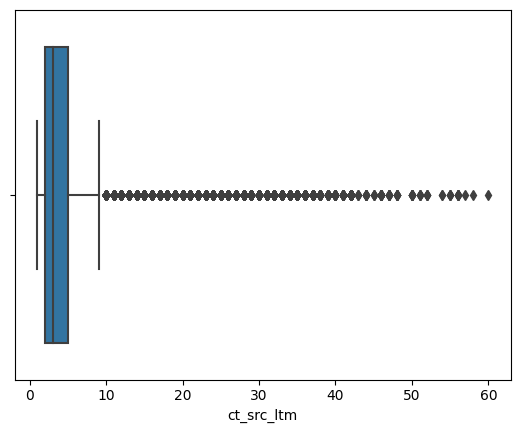

In [57]:
sns.boxplot(df['ct_src_ltm'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


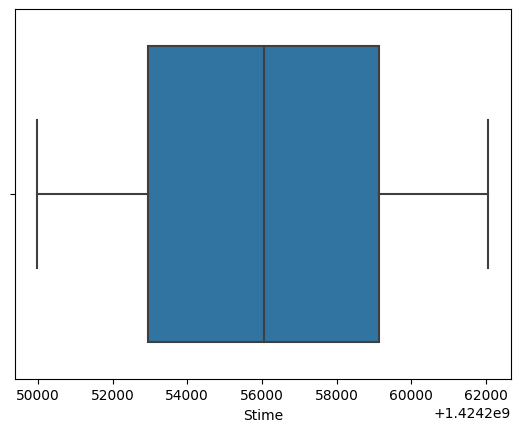

In [58]:
sns.boxplot(df['Stime'])
plt.show()

In [69]:
df['ackdat'].value_counts()

0.000000    94891
0.000124     8400
0.000125     7968
0.000123     7722
0.000126     6668
            ...  
0.121509        1
0.038933        1
0.047885        1
0.080545        1
0.279467        1
Name: ackdat, Length: 19509, dtype: int64

In [70]:
df['ackdat'].isna().sum()

0

In [71]:
df['ct_ftp_cmd'].value_counts()

     300349
1      6335
4        27
2         7
Name: ct_ftp_cmd, dtype: int64

In [72]:
df['ct_ftp_cmd'].head(30)

0      
1      
2      
3      
4      
5      
6      
7      
10     
13     
14     
15     
16     
17     
18     
19     
20     
21     
22     
23     
24     
25     
26     
27     
28     
29     
30     
31     
32    1
33     
Name: ct_ftp_cmd, dtype: object

In [73]:
df['ct_flw_http_mthd'].value_counts()

1.0    32287
4.0      623
2.0       84
9.0       21
6.0        4
Name: ct_flw_http_mthd, dtype: int64

In [74]:
df['ct_flw_http_mthd']

0         1.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
440035    2.0
440037    2.0
440038    NaN
440041    2.0
440042    NaN
Name: ct_flw_http_mthd, Length: 306718, dtype: float64

In [75]:
df['dur'].value_counts()

0.000009    4882
0.000003    2680
0.000008    2219
0.000007    1808
0.000005    1596
            ... 
1.294716       1
6.470218       1
1.217954       1
2.068470       1
0.087306       1
Name: dur, Length: 142811, dtype: int64

In [76]:
df.isnull().sum()

srcip                    0
sport                    0
dstip                    0
dsport                   0
proto                    0
state                    0
dur                      0
sbytes                   0
dbytes                   0
sttl                     0
dttl                     0
sloss                    0
dloss                    0
service                  0
Sload                    0
Dload                    0
Spkts                    0
Dpkts                    0
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smeansz                  0
dmeansz                  0
trans_depth              0
res_bdy_len              0
Sjit                     0
Djit                     0
Stime                    0
Ltime                    0
Sintpkt                  0
Dintpkt                  0
tcprtt                   0
synack                   0
ackdat                   0
is_sm_ips_ports          0
ct_state_ttl             0
c

In [77]:
df['ct_ftp_cmd'].value_counts()

     300349
1      6335
4        27
2         7
Name: ct_ftp_cmd, dtype: int64

In [78]:
df[df['ct_ftp_cmd']==' ']

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633186,25056,1094788,31,...,,9,7,2,3,2,1,6,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440035,59.166.0.1,38606,149.171.126.9,80,tcp,CON,0.564998,14106,772406,31,...,,1,1,4,2,2,2,2,NaN,0
440037,59.166.0.1,38606,149.171.126.9,80,tcp,CON,0.564998,14106,772406,31,...,,2,1,4,2,2,2,2,NaN,0
440038,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
440041,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [79]:
#pip install imbalanced-learn

### Missing value handling

In [80]:
df['attack_cat'] = df['attack_cat'].fillna('None')

In [81]:
df.isnull().sum()

srcip                    0
sport                    0
dstip                    0
dsport                   0
proto                    0
state                    0
dur                      0
sbytes                   0
dbytes                   0
sttl                     0
dttl                     0
sloss                    0
dloss                    0
service                  0
Sload                    0
Dload                    0
Spkts                    0
Dpkts                    0
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smeansz                  0
dmeansz                  0
trans_depth              0
res_bdy_len              0
Sjit                     0
Djit                     0
Stime                    0
Ltime                    0
Sintpkt                  0
Dintpkt                  0
tcprtt                   0
synack                   0
ackdat                   0
is_sm_ips_ports          0
ct_state_ttl             0
c

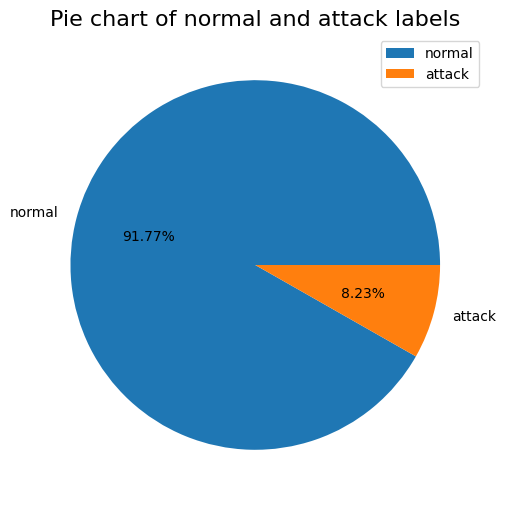

In [82]:
plt.figure(figsize=(6,6))
plt.pie(df.Label.value_counts(),labels=['normal','attack'],autopct='%0.2f%%')
plt.title("Pie chart of normal and attack labels",fontsize=16)
plt.legend()
plt.show()

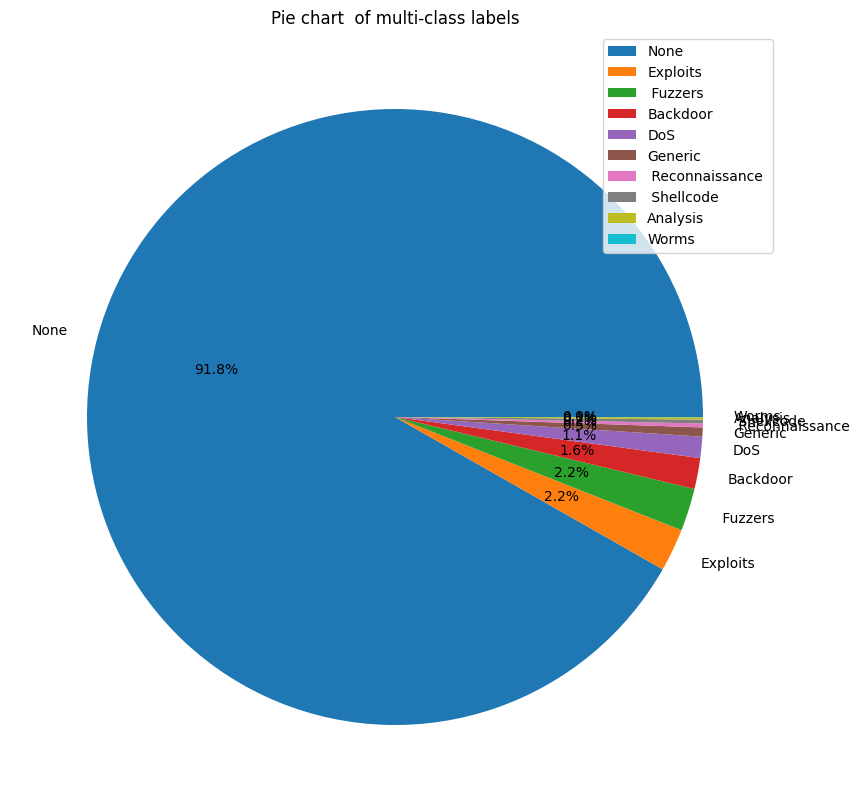

In [83]:

plt.figure(figsize=(10,10))
plt.pie(df.attack_cat.value_counts(),labels=df.attack_cat.unique(),autopct='%0.1f%%')
plt.title('Pie chart  of multi-class labels')
plt.legend(loc='best')
plt.show()
     

In [84]:
df['ct_flw_http_mthd']=df['ct_flw_http_mthd'].fillna(0)

In [85]:
df['ct_flw_http_mthd'].value_counts()

0.0    273699
1.0     32287
4.0       623
2.0        84
9.0        21
6.0         4
Name: ct_flw_http_mthd, dtype: int64

In [86]:
df['ct_ftp_cmd'].value_counts()

     300349
1      6335
4        27
2         7
Name: ct_ftp_cmd, dtype: int64

In [87]:
df['ct_ftp_cmd']=df['ct_ftp_cmd'].replace(' ',0)

In [88]:
df['ct_ftp_cmd'].value_counts()

0    300349
1      6335
4        27
2         7
Name: ct_ftp_cmd, dtype: int64

In [89]:
df['is_ftp_login'].value_counts()

1.0    6335
4.0      27
2.0       7
Name: is_ftp_login, dtype: int64

In [90]:
df['is_ftp_login']=df['is_ftp_login'].replace(4,1)

In [91]:
df['is_ftp_login'].value_counts()

1.0    6362
2.0       7
Name: is_ftp_login, dtype: int64

In [92]:
df['is_ftp_login']=df['is_ftp_login'].replace(2,1)

In [93]:
df['is_ftp_login'].value_counts()

1.0    6369
Name: is_ftp_login, dtype: int64

In [94]:
df['is_ftp_login']=df['is_ftp_login'].fillna(0)

In [95]:
df['is_ftp_login'].value_counts()

0.0    300349
1.0      6369
Name: is_ftp_login, dtype: int64

In [96]:
df.isnull().sum()

srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_dst_spo

In [97]:
### there is no more missing values

In [98]:
df['service'].value_counts()

-           168099
dns          61481
http         32777
ftp-data     18228
smtp         12139
ssh           6842
ftp           6692
pop3           363
ssl             30
snmp            26
dhcp            25
radius           9
irc              7
Name: service, dtype: int64

In [99]:
df['service']=df['service'].replace('-','Nil')

In [100]:
df['service'].value_counts()

Nil         168099
dns          61481
http         32777
ftp-data     18228
smtp         12139
ssh           6842
ftp           6692
pop3           363
ssl             30
snmp            26
dhcp            25
radius           9
irc              7
Name: service, dtype: int64

In [101]:
df['Sjit'].value_counts()

0.000000       80501
0.623668          55
0.625082          50
0.620840          49
0.627911          48
               ...  
184.624980         1
31.242077          1
46.399726          1
8766.726867        1
1221.136547        1
Name: Sjit, Length: 213095, dtype: int64

In [102]:
df[df['ct_flw_http_mthd']=='NaN']

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label


#### Dropping columns

In [103]:
df.drop(['srcip','sport','dstip','dsport'],axis=1, inplace=True)

In [104]:
df.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,tcp,FIN,5.864748,19410,1087890,31,29,2,370,http,...,0,3,1,4,4,1,1,1,None,0
1,udp,CON,0.001391,146,178,31,29,0,0,dns,...,0,3,5,2,7,1,1,4,None,0
2,tcp,FIN,0.053948,37812,3380,31,29,19,8,smtp,...,0,1,1,4,7,1,1,3,None,0
3,udp,CON,0.000953,146,178,31,29,0,0,dns,...,0,2,5,2,1,1,1,2,None,0
4,tcp,FIN,8.633186,25056,1094788,31,29,38,390,Nil,...,0,9,7,2,3,2,1,6,None,0


In [105]:
df.shape

(306718, 45)

In [106]:
df

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,tcp,FIN,5.864748,19410,1087890,31,29,2,370,http,...,0,3,1,4,4,1,1,1,None,0
1,udp,CON,0.001391,146,178,31,29,0,0,dns,...,0,3,5,2,7,1,1,4,None,0
2,tcp,FIN,0.053948,37812,3380,31,29,19,8,smtp,...,0,1,1,4,7,1,1,3,None,0
3,udp,CON,0.000953,146,178,31,29,0,0,dns,...,0,2,5,2,1,1,1,2,None,0
4,tcp,FIN,8.633186,25056,1094788,31,29,38,390,Nil,...,0,9,7,2,3,2,1,6,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440035,tcp,CON,0.564998,14106,772406,31,29,2,262,http,...,0,1,1,4,2,2,2,2,None,0
440037,tcp,CON,0.564998,14106,772406,31,29,2,262,Nil,...,0,2,1,4,2,2,2,2,None,0
440038,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,...,0,1,2,3,3,1,1,3,None,0
440041,tcp,CON,2.200934,3498,166054,31,29,2,57,http,...,0,1,1,2,4,2,2,2,None,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306718 entries, 0 to 440042
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   proto             306718 non-null  object 
 1   state             306718 non-null  object 
 2   dur               306718 non-null  float64
 3   sbytes            306718 non-null  int64  
 4   dbytes            306718 non-null  int64  
 5   sttl              306718 non-null  int64  
 6   dttl              306718 non-null  int64  
 7   sloss             306718 non-null  int64  
 8   dloss             306718 non-null  int64  
 9   service           306718 non-null  object 
 10  Sload             306718 non-null  float64
 11  Dload             306718 non-null  float64
 12  Spkts             306718 non-null  int64  
 13  Dpkts             306718 non-null  int64  
 14  swin              306718 non-null  int64  
 15  dwin              306718 non-null  int64  
 16  stcpb             30

In [108]:
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].astype('int')

In [109]:
df['ct_ftp_cmd'].value_counts()

0    300349
1      6335
4        27
2         7
Name: ct_ftp_cmd, dtype: int64

#### Encoding

In [110]:
df

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,tcp,FIN,5.864748,19410,1087890,31,29,2,370,http,...,0,3,1,4,4,1,1,1,None,0
1,udp,CON,0.001391,146,178,31,29,0,0,dns,...,0,3,5,2,7,1,1,4,None,0
2,tcp,FIN,0.053948,37812,3380,31,29,19,8,smtp,...,0,1,1,4,7,1,1,3,None,0
3,udp,CON,0.000953,146,178,31,29,0,0,dns,...,0,2,5,2,1,1,1,2,None,0
4,tcp,FIN,8.633186,25056,1094788,31,29,38,390,Nil,...,0,9,7,2,3,2,1,6,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440035,tcp,CON,0.564998,14106,772406,31,29,2,262,http,...,0,1,1,4,2,2,2,2,None,0
440037,tcp,CON,0.564998,14106,772406,31,29,2,262,Nil,...,0,2,1,4,2,2,2,2,None,0
440038,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,...,0,1,2,3,3,1,1,3,None,0
440041,tcp,CON,2.200934,3498,166054,31,29,2,57,http,...,0,1,1,2,4,2,2,2,None,0


In [111]:
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()
df["proto"] = label_en.fit_transform(df["proto"])
df

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,113,FIN,5.864748,19410,1087890,31,29,2,370,http,...,0,3,1,4,4,1,1,1,None,0
1,119,CON,0.001391,146,178,31,29,0,0,dns,...,0,3,5,2,7,1,1,4,None,0
2,113,FIN,0.053948,37812,3380,31,29,19,8,smtp,...,0,1,1,4,7,1,1,3,None,0
3,119,CON,0.000953,146,178,31,29,0,0,dns,...,0,2,5,2,1,1,1,2,None,0
4,113,FIN,8.633186,25056,1094788,31,29,38,390,Nil,...,0,9,7,2,3,2,1,6,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440035,113,CON,0.564998,14106,772406,31,29,2,262,http,...,0,1,1,4,2,2,2,2,None,0
440037,113,CON,0.564998,14106,772406,31,29,2,262,Nil,...,0,2,1,4,2,2,2,2,None,0
440038,113,FIN,0.087306,320,1828,31,29,1,2,ftp-data,...,0,1,2,3,3,1,1,3,None,0
440041,113,CON,2.200934,3498,166054,31,29,2,57,http,...,0,1,1,2,4,2,2,2,None,0


In [112]:
df["state"] = label_en.fit_transform(df["state"])

In [113]:
df["service"] = label_en.fit_transform(df["service"])

In [114]:
df

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,113,4,5.864748,19410,1087890,31,29,2,370,5,...,0,3,1,4,4,1,1,1,None,0
1,119,1,0.001391,146,178,31,29,0,0,2,...,0,3,5,2,7,1,1,4,None,0
2,113,4,0.053948,37812,3380,31,29,19,8,9,...,0,1,1,4,7,1,1,3,None,0
3,119,1,0.000953,146,178,31,29,0,0,2,...,0,2,5,2,1,1,1,2,None,0
4,113,4,8.633186,25056,1094788,31,29,38,390,0,...,0,9,7,2,3,2,1,6,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440035,113,1,0.564998,14106,772406,31,29,2,262,5,...,0,1,1,4,2,2,2,2,None,0
440037,113,1,0.564998,14106,772406,31,29,2,262,0,...,0,2,1,4,2,2,2,2,None,0
440038,113,4,0.087306,320,1828,31,29,1,2,4,...,0,1,2,3,3,1,1,3,None,0
440041,113,1,2.200934,3498,166054,31,29,2,57,5,...,0,1,1,2,4,2,2,2,None,0


In [115]:
df['state'].value_counts()

4     210534
1      74857
5      19798
8       1330
9         95
2         85
7          6
12         2
13         2
6          2
0          2
10         2
3          2
11         1
Name: state, dtype: int64

In [116]:
df.columns


Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label'],
      dtype='object')

In [117]:
x= df.drop(['attack_cat', 'Label'],axis=1)
y=df['Label']

In [118]:
x

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,113,4,5.864748,19410,1087890,31,29,2,370,5,...,1.0,0.0,0,3,1,4,4,1,1,1
1,119,1,0.001391,146,178,31,29,0,0,2,...,0.0,0.0,0,3,5,2,7,1,1,4
2,113,4,0.053948,37812,3380,31,29,19,8,9,...,0.0,0.0,0,1,1,4,7,1,1,3
3,119,1,0.000953,146,178,31,29,0,0,2,...,0.0,0.0,0,2,5,2,1,1,1,2
4,113,4,8.633186,25056,1094788,31,29,38,390,0,...,0.0,0.0,0,9,7,2,3,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440035,113,1,0.564998,14106,772406,31,29,2,262,5,...,2.0,0.0,0,1,1,4,2,2,2,2
440037,113,1,0.564998,14106,772406,31,29,2,262,0,...,2.0,0.0,0,2,1,4,2,2,2,2
440038,113,4,0.087306,320,1828,31,29,1,2,4,...,0.0,0.0,0,1,2,3,3,1,1,3
440041,113,1,2.200934,3498,166054,31,29,2,57,5,...,2.0,0.0,0,1,1,2,4,2,2,2


In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [120]:
from sklearn.feature_selection import SelectKBest

In [121]:
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')

In [122]:
fs.fit(x_train, y_train)

SelectKBest(k='all')

In [123]:
x_train_fs = fs.transform(x_train)

In [124]:
x_test_fs = fs.transform(x_test)

Feature 0: 1645.433032
Feature 1: 12762.304483
Feature 2: 572.264025
Feature 3: 487.025481
Feature 4: 461.380673
Feature 5: 291323.419894
Feature 6: 59465.153223
Feature 7: 99.895244
Feature 8: 756.103035
Feature 9: 106.443912
Feature 10: 11514.371626
Feature 11: 7407.433050
Feature 12: 460.013107
Feature 13: 1094.629403
Feature 14: 3076.184167
Feature 15: 2975.022823
Feature 16: 1418.364849
Feature 17: 1451.926355
Feature 18: 979.783262
Feature 19: 7182.426336
Feature 20: 1409.448491
Feature 21: 23.931813
Feature 22: 629.902184
Feature 23: 156.097798
Feature 24: 16.165325
Feature 25: 10.787349
Feature 26: 8.924932
Feature 27: 0.562136
Feature 28: 8877.068825
Feature 29: 5922.340975
Feature 30: 9073.057389
Feature 31: 23.597841
Feature 32: 168440.601309
Feature 33: 1178.528554
Feature 34: 63.852074
Feature 35: 63.945880
Feature 36: 3752.279169
Feature 37: 3678.069128
Feature 38: 1192.812749
Feature 39: 1310.560904
Feature 40: 9023.018893
Feature 41: 13518.704379
Feature 42: 10326.47878

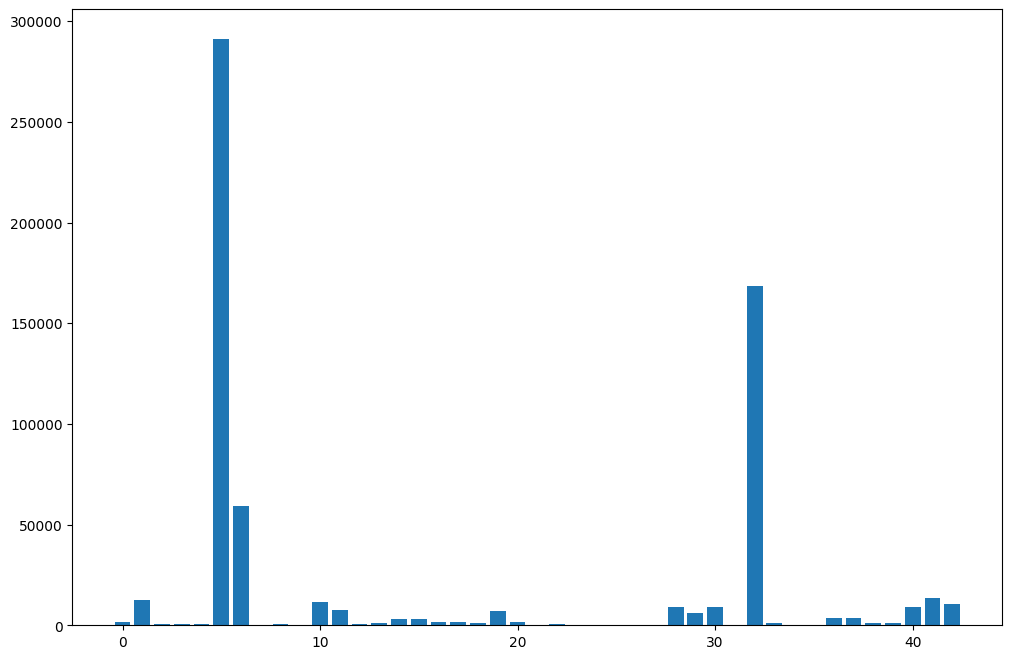

In [125]:
import matplotlib.pyplot as plt
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
#### plot the scores
plt.figure(figsize=(12,8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

[ 1645.433032, 12762.304483,572.264025,487.025481,461.380673 ,291323.419894,59465.153223 ,99.895244 ,756.103035 ,106.443912,11514.371626,7407.433050 ,460.013107,1094.629403,3076.184167 ,2975.022823 ,1418.364849 ,1451.926355 ,979.783262 ,7182.426336 ,1409.448491,23.931813 ,629.902184 ,156.097798 ,16.165325,10.787349,8.924932,0.562136,8877.068825,5922.340975,9073.057389,23.597841,168440.601309,1178.528554,63.852074,63.945880,3752.279169,3678.069128,1192.812749,1310.560904,9023.018893,13518.704379,10326.478785]

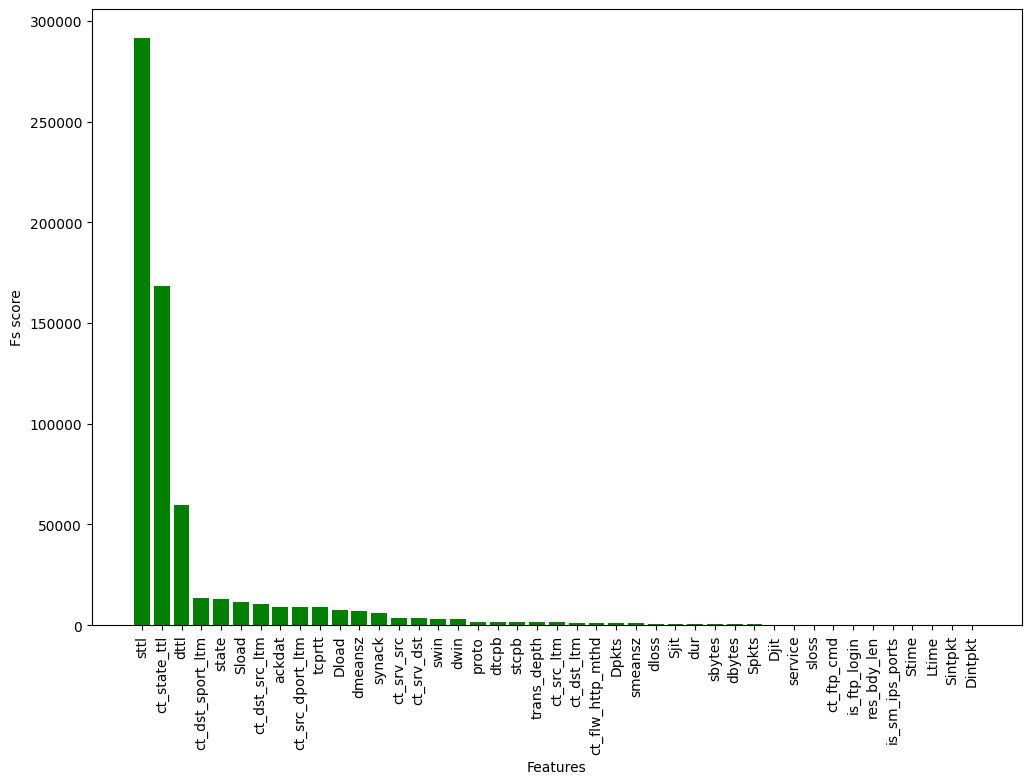

In [126]:
plt.figure(figsize=(12,8))
df1=pd.DataFrame(
dict(names=['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm'], scores=[1645.433032, 12762.304483,572.264025,487.025481,461.380673 ,291323.419894,59465.153223 ,99.895244 ,756.103035 ,106.443912,11514.371626,7407.433050 ,460.013107,1094.629403,3076.184167 ,2975.022823 ,1418.364849 ,1451.926355 ,979.783262 ,7182.426336 ,1409.448491,23.931813 ,629.902184 ,156.097798 ,16.165325,10.787349,8.924932,0.562136,8877.068825,5922.340975,9073.057389,23.597841,168440.601309,1178.528554,63.852074,63.945880,3752.279169,3678.069128,1192.812749,1310.560904,9023.018893,13518.704379,10326.478785])
)

plt.xlabel("Features")

plt.ylabel("Fs score")
plt.xticks(rotation=90)
df_sorted=df1.sort_values('scores',ascending=False)
plt.bar('names','scores',data=df_sorted, color='green')
plt.show()

In [127]:
df.drop(['proto', 'dur', 'sbytes', 'dbytes', 'sloss',
       'dloss', 'service', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt',
       'synack', 'is_sm_ips_ports',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'attack_cat'],axis=1, inplace=True)

In [128]:
df

,state,sttl,dttl,Sload,tcprtt,ackdat,ct_state_ttl,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,4,31,29,2.640454e+04,0.000771,0.000133,0,1,1,1,0
1,1,31,29,4.198418e+05,0.000000,0.000000,0,1,1,4,0
2,4,31,29,5.503374e+06,0.000674,0.000134,0,1,1,3,0
3,1,31,29,6.128017e+05,0.000000,0.000000,0,1,1,2,0
4,4,31,29,2.316642e+04,0.000654,0.000138,0,2,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...
440035,1,31,29,1.989812e+05,0.000669,0.000139,0,2,2,2,0
440037,1,31,29,1.989812e+05,0.000669,0.000139,0,2,2,2,0
440038,4,31,29,2.446567e+04,0.000608,0.000140,0,1,1,3,0
440041,1,31,29,1.249651e+04,0.000680,0.000139,0,2,2,2,0


In [129]:
X= df.drop('Label',axis=1)
y=df['Label']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

### Scaling

In [131]:
num_col=['state', 'sttl', 'dttl', 'Sload', 'tcprtt', 'ackdat', 'ct_state_ttl',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']

In [132]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train.loc[:,num_col] = sc.fit_transform(X_train[num_col])
X_test.loc[:,num_col] = sc.fit_transform(X_test[num_col])


#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

In [133]:
X_train

,state,sttl,dttl,Sload,tcprtt,ackdat,ct_state_ttl,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
279924,-1.700108,-0.333484,-0.219131,-0.142830,-0.154487,-0.143126,-0.304692,-0.263324,-0.177491,0.100032
336594,0.467417,-0.333484,-0.219131,-0.148923,-0.146018,-0.139942,-0.304692,-0.263324,-0.177491,-0.266957
380664,0.467417,-0.333484,-0.219131,-0.156545,-0.146509,-0.139868,-0.304692,-0.263324,-0.177491,-0.450451
270138,0.467417,-0.333484,-0.219131,-0.143134,-0.145364,-0.139991,-0.304692,-0.263324,-0.177491,-0.266957
56821,1.189925,0.119076,-0.743449,1.423136,-0.154487,-0.143126,-0.304692,0.018342,0.236208,6.338845
...,...,...,...,...,...,...,...,...,...,...
21768,-1.700108,-0.333484,-0.219131,-0.155450,-0.154487,-0.143126,-0.304692,-0.263324,-0.177491,-0.083462
176538,0.467417,-0.333484,-0.219131,-0.158249,-0.147340,-0.140361,-0.304692,0.863338,-0.177491,0.467021
98772,0.467417,-0.333484,-0.219131,-0.162781,-0.146421,-0.140065,-0.304692,0.018342,-0.177491,-0.083462
379834,0.467417,-0.333484,-0.219131,-0.154511,-0.146849,-0.140016,-0.304692,-0.263324,-0.177491,-0.450451


### LogisticRegression

In [134]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,classification_report

In [135]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9641562188169971

In [136]:
lr_acc=accuracy_score(y_test,y_pred)

In [137]:
lr_acc

0.9641562188169971

In [138]:
confusion_matrix(y_test, y_pred)

array([[90744,  2115],
       [ 1513,  6845]], dtype=int64)

In [139]:
precision_score(y_test,y_pred)

0.7639508928571429

In [140]:
lr_precision=precision_score(y_test,y_pred)

In [141]:
recall_score(y_test, y_pred)

0.8189758315386456

In [142]:
lr_recall=recall_score(y_test, y_pred)

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90744  2115]
 [ 1513  6845]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     92859
           1       0.76      0.82      0.79      8358

    accuracy                           0.96    101217
   macro avg       0.87      0.90      0.89    101217
weighted avg       0.97      0.96      0.96    101217



### kNN

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.9790549018445518

In [145]:
knn_accuracy=accuracy_score(y_test,y_pred_knn)

In [146]:
confusion_matrix(y_test, y_pred_knn)

array([[91942,   917],
       [ 1203,  7155]], dtype=int64)

In [147]:
precision_score(y_test,y_pred_knn)

0.8863974231912785

In [148]:
knn_precision=precision_score(y_test,y_pred_knn)

In [149]:
recall_score(y_test, y_pred_knn)

0.8560660445082555

In [150]:
knn_recall=recall_score(y_test, y_pred_knn)

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[91942   917]
 [ 1203  7155]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     92859
           1       0.89      0.86      0.87      8358

    accuracy                           0.98    101217
   macro avg       0.94      0.92      0.93    101217
weighted avg       0.98      0.98      0.98    101217



## DecisionTreeClassifier

In [152]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
accuracy_score(y_test,y_pred_dt)

0.9753104715611014

In [153]:
dt_accuracy=accuracy_score(y_test,y_pred_dt)

In [154]:
confusion_matrix(y_test, y_pred_dt)

array([[91347,  1512],
       [  987,  7371]], dtype=int64)

In [155]:
precision_score(y_test,y_pred_dt)

0.8297872340425532

In [156]:
dt_precision=precision_score(y_test,y_pred_dt)

In [157]:
recall_score(y_test, y_pred_dt)

0.8819095477386935

In [158]:
dt_recall=recall_score(y_test, y_pred_dt)

In [159]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[91347  1512]
 [  987  7371]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     92859
           1       0.83      0.88      0.86      8358

    accuracy                           0.98    101217
   macro avg       0.91      0.93      0.92    101217
weighted avg       0.98      0.98      0.98    101217



## RandomForestClassifier

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9789067053953387

In [161]:
rf_accuracy=accuracy_score(y_test,y_pred_rf)

In [162]:
confusion_matrix(y_test, y_pred_rf)

array([[91529,  1330],
       [  805,  7553]], dtype=int64)

In [163]:
precision_score(y_test,y_pred_rf)

0.8502758077226162

In [164]:
rf_precision=precision_score(y_test,y_pred_rf)

In [165]:
recall_score(y_test, y_pred_rf)

0.9036850921273032

In [166]:
rf_recall=recall_score(y_test, y_pred_rf)

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[91529  1330]
 [  805  7553]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     92859
           1       0.85      0.90      0.88      8358

    accuracy                           0.98    101217
   macro avg       0.92      0.94      0.93    101217
weighted avg       0.98      0.98      0.98    101217



### SVM

In [168]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [169]:
#creating an instance
svm_lr = LinearSVC()

#Fitting the model
svm_lr.fit(X_train, y_train)

#Prediction
y_pred_svm_lr = svm_lr.predict(X_test)
accuracy_score(y_test,y_pred_svm_lr)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9661124119466098

In [170]:
svm_accuracy_lr=accuracy_score(y_test,y_pred_svm_lr)

In [171]:
svm_accuracy_lr

0.9661124119466098

In [172]:
confusion_matrix(y_test, y_pred_svm_lr)

array([[90691,  2168],
       [ 1262,  7096]], dtype=int64)

In [173]:
precision_score(y_test,y_pred_svm_lr)

0.7659758203799655

In [174]:
svm_lr_precision=precision_score(y_test,y_pred_svm_lr)

In [175]:
recall_score(y_test, y_pred_svm_lr)

0.8490069394592008

In [176]:
svm_lr_recall=recall_score(y_test, y_pred_svm_lr)

In [203]:
results = pd.DataFrame({
    'Model': ['Logistic','kNN','DecisionTree','RandomForest','SVM linear'],
    'Accuracy score': [lr_acc,knn_accuracy,dt_accuracy,rf_accuracy,svm_accuracy_lr],'Precision':[lr_precision,knn_precision,dt_precision,rf_precision,svm_lr_precision],'Recall':[lr_recall,knn_recall,dt_recall,rf_recall,svm_lr_recall] })
result_df = results.sort_values(by='Accuracy score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Accuracy score,Precision,Recall
Model,,,
kNN,0.979055,0.886397,0.856066
RandomForest,0.978907,0.850276,0.903685
DecisionTree,0.975310,0.829787,0.881910
SVM linear,0.966112,0.765976,0.849007
Logistic,0.964156,0.763951,0.818976


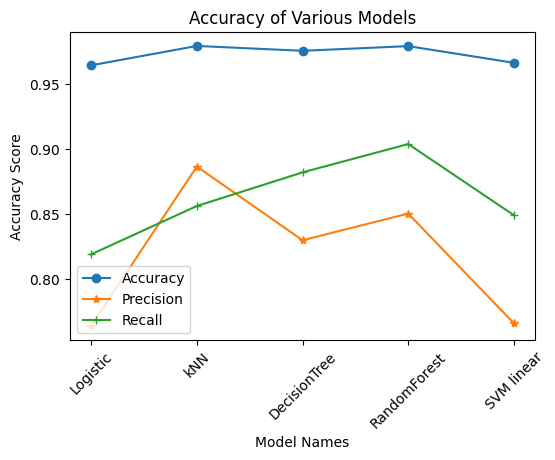

In [204]:
plt.figure(figsize=(6,4))
plt.plot(range(1,6),[lr_acc,knn_accuracy,dt_accuracy,rf_accuracy,svm_accuracy_lr],marker='o',label="Accuracy")
plt.plot(range(1,6),[lr_precision,knn_precision,dt_precision,rf_precision,svm_lr_precision],marker='*',label="Precision")
plt.plot(range(1,6),[lr_recall,knn_recall,dt_recall,rf_recall,svm_lr_recall],marker='+',label="Recall")
plt.xticks(range(1,6),['Logistic','kNN','DecisionTree','RandomForest','SVM linear'],rotation=45)
plt.legend(loc="lower left")
plt.title('Accuracy of Various Models')
plt.xlabel('Model Names')
plt.ylabel("Accuracy Score")
plt.show()

#### from the graph it is clear that recall score(90%) is high for Random Forest with an accuracy of 97% and precision 85%

### StratifiedKFold validation

In [188]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [189]:
from sklearn.model_selection import cross_val_score

In [190]:
skcv_result=cross_val_score(rf,X,y,cv=skfold_validator)

In [191]:
np.mean(skcv_result)

0.9777873911579175

In [192]:
print(cross_val_score(rf, X, y, scoring="recall", cv = 10))
mean_score = cross_val_score(rf, X, y, scoring="recall", cv = 10).mean()
std_score = cross_val_score(rf, X, y, scoring="recall", cv = 10).std()

[0.87643564 0.94338876 0.88400633 0.8871734  0.81551861 0.8317498
 0.93190816 0.89469517 0.89425743 0.84752475]


In [193]:
print(mean_score)
print(std_score)

0.8824872259197416
0.038547420488385414


### Hyper parameter tuning

In [194]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [195]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [196]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [197]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train, y_train)
#Fitting 5 folds for each of 100 candidates, totalling 500 fits

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [198]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}  



In [199]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf= 3, max_features = 'sqrt', max_depth= 120, bootstrap=True)
rf2.fit(X_train,y_train)
y_pred_rf2=rf2.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9789067053953387

In [200]:
precision_score(y_test,y_pred_rf2)

0.8499834052439429

In [201]:
recall_score(y_test, y_pred_rf2)

0.9192390524048816

In [202]:
print(confusion_matrix(y_test, y_pred_rf2))
print(classification_report(y_test, y_pred_rf2))

[[91503  1356]
 [  675  7683]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     92859
           1       0.85      0.92      0.88      8358

    accuracy                           0.98    101217
   macro avg       0.92      0.95      0.94    101217
weighted avg       0.98      0.98      0.98    101217

